In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Folders

In [2]:
results_folder = 'Q:\\Personal\\Irina\\projects\\isttc\\results\\monkey\\fixation_period_1500ms\\'

### Load data

In [3]:
sttc_df = pd.read_pickle(results_folder + 'not_binned_sttc\\' + 'tau_bsl_sua_sttc_50ms_20lags_df.pkl')
pearson_df = pd.read_pickle(results_folder + 'binned_pearson\\' + 'tau_bsl_sua_pearson_50ms_20lags_df.pkl')

print('let sttc_df {}, len pearson_df {}'.format(len(sttc_df), len(pearson_df)))

let sttc_df 33018, len pearson_df 33018


In [4]:
sttc_df.head()

,unit_id,trial_id,condition_id,acf,acf_decay_1_4,popt,pcov,r_squared,tau,tau_ms,...,acf_15,acf_16,acf_17,acf_18,acf_19,acf_20,popt_0,popt_1,popt_2,acf_fit_failed
0,0,0,0,"[1.0, 0.8489484018632951, -0.00113918284392739...",True,NaN,NaN,NaN,NaN,NaN,...,-0.001140,-0.001140,-0.001140,-0.001140,-0.001140,-0.001140,NaN,NaN,NaN,True
1,0,1,0,"[1.0, 0.8282696315133622, -0.00096716195128570...",True,NaN,NaN,NaN,NaN,NaN,...,-0.000968,-0.000968,-0.000968,-0.000968,-0.000968,-0.000968,NaN,NaN,NaN,True
2,0,2,0,"[1.0, 0.9364009358691534, -0.00158208041363358...",True,NaN,NaN,NaN,NaN,NaN,...,-0.001583,-0.001583,-0.001583,-0.001583,-0.001583,-0.001583,NaN,NaN,NaN,True
3,0,3,0,"[1.0, 0.952130935540541, -0.0036190179375303, ...",True,NaN,NaN,NaN,NaN,NaN,...,-0.003621,-0.003621,-0.003621,-0.003621,-0.003621,-0.003621,NaN,NaN,NaN,True
4,0,4,0,"[1.0, 0.9499327904161492, -0.00072707989629978...",True,NaN,NaN,NaN,NaN,NaN,...,-0.000727,-0.000727,-0.000728,-0.000728,-0.000728,-0.000728,NaN,NaN,NaN,True


In [5]:
pearson_df.head()

,unit_id,trial_id,condition_id,acf,acf_decay_1_4,popt,pcov,r_squared,tau,tau_ms,...,acf_15,acf_16,acf_17,acf_18,acf_19,acf_20,popt_0,popt_1,popt_2,acf_fit_failed
0,0,0,0,"[1.0, -0.016595339990489767, -0.11022349025202...",False,"[840.092672156566, 11.014596408154562, -0.0304...","[[1.077075998679899e+17, 132991388600829.8, 16...",0.001230,0.090789,4.539431,...,-0.034950,-0.128578,-0.185117,0.057917,-0.041417,0.073229,840.092672,11.014596,-0.030435,False
1,0,1,0,"[1.0, 0.021739130434782598, 0.0434782608695652...",False,"[0.3507418102741434, 2.0366202765825974, -0.02...","[[60.84484223758324, 169.16441198875847, 0.055...",0.006963,0.491010,24.550477,...,-0.065217,-0.130435,-0.065217,-0.086957,0.065217,0.086957,0.350742,2.036620,-0.020023,False
2,0,2,0,"[1.0, 0.22380952380952382, 0.18571428571428578...",True,"[0.9595269448378968, 1.1224890691754204, -0.05...","[[2.032239769855773, 1.7646794612303478, 0.011...",0.208556,0.890877,44.543864,...,-0.154762,-0.145238,-0.064286,-0.019048,-0.021429,-0.095238,0.959527,1.122489,-0.058863,False
3,0,3,0,"[1.0, -0.02756800649614294, -0.057572066585464...",True,NaN,NaN,NaN,NaN,NaN,...,-0.029842,-0.132927,0.230491,-0.010231,0.207024,-0.106780,NaN,NaN,NaN,True
4,0,4,0,"[1.0, 0.14583333333333331, 0.32291666666666663...",False,"[0.557578139005768, 0.5406520403117887, -0.068...","[[0.16908215115723665, 0.16222970127163708, 0....",0.264596,1.849618,92.480924,...,0.125000,-0.072917,0.166667,-0.093750,0.020833,-0.020833,0.557578,0.540652,-0.068563,False


In [6]:
sttc_df_subset = sttc_df[['unit_id', 'trial_id', 'acf_decay_1_4', 'r_squared', 'tau', 'tau_ms', 'acf_fit_failed']].copy()
pearson_df_subset = pearson_df[['unit_id', 'trial_id', 'acf_decay_1_4', 'r_squared', 'tau', 'tau_ms', 'acf_fit_failed']].copy()

In [7]:
df_merged = pd.merge(sttc_df_subset, pearson_df_subset, on=['unit_id','trial_id'], how='inner', suffixes=('_sttc', '_pear'))
df_merged

,unit_id,trial_id,acf_decay_1_4_sttc,r_squared_sttc,tau_sttc,tau_ms_sttc,acf_fit_failed_sttc,acf_decay_1_4_pear,r_squared_pear,tau_pear,tau_ms_pear,acf_fit_failed_pear
0,0,0,True,NaN,NaN,NaN,True,False,0.001230,0.090789,4.539431e+00,False
1,0,1,True,NaN,NaN,NaN,True,False,0.006963,0.491010,2.455048e+01,False
2,0,2,True,NaN,NaN,NaN,True,True,0.208556,0.890877,4.454386e+01,False
3,0,3,True,NaN,NaN,NaN,True,True,NaN,NaN,NaN,True
4,0,4,True,NaN,NaN,NaN,True,False,0.264596,1.849618,9.248092e+01,False
...,...,...,...,...,...,...,...,...,...,...,...,...
33013,543,4,False,NaN,NaN,NaN,True,True,0.481828,6.416044,3.208022e+02,False
33014,543,15,True,NaN,NaN,NaN,True,False,0.987406,0.072705,3.635248e+00,False
33015,543,18,False,NaN,NaN,NaN,True,True,NaN,NaN,NaN,True
33016,543,19,True,NaN,NaN,NaN,True,False,0.221980,0.084193,4.209629e+00,False


In [8]:
df_merged.dropna(inplace=True)
len(df_merged)

287

In [10]:
df_merged['diff'] = df_merged['r_squared_sttc'] - df_merged['r_squared_pear']
df_merged

,unit_id,trial_id,acf_decay_1_4_sttc,r_squared_sttc,tau_sttc,tau_ms_sttc,acf_fit_failed_sttc,acf_decay_1_4_pear,r_squared_pear,tau_pear,tau_ms_pear,acf_fit_failed_pear,diff
291,4,7,True,0.999991,76813.275460,3.840664e+06,False,True,0.989758,0.327272,16.363615,False,0.010232
1146,15,27,True,0.994778,0.077488,3.874381e+00,False,False,0.530238,2.946609,147.330450,False,0.464540
1849,27,1,True,0.999984,107098.487081,5.354924e+06,False,True,0.989758,0.327272,16.363615,False,0.010226
1929,29,33,True,0.134874,55084.034992,2.754202e+06,False,True,0.005588,0.570365,28.518250,False,0.129286
2390,37,14,True,0.996722,0.076846,3.842322e+00,False,False,0.000176,0.470272,23.513624,False,0.996546
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32777,540,8,True,0.984426,0.079215,3.960762e+00,False,True,0.853268,1.259159,62.957972,False,0.131158
32832,541,13,True,0.996865,0.076819,3.840959e+00,False,True,0.710462,2.542053,127.102627,False,0.286403
32839,541,20,True,0.996980,0.076741,3.837035e+00,False,True,0.140226,0.775538,38.776907,False,0.856754
32855,541,36,True,0.996727,0.076884,3.844178e+00,False,False,0.547213,2.661183,133.059173,False,0.449514


### Plots

#### ACF

In [16]:
sttc_df

,unit_id,trial_id,condition_id,acf,acf_decay_1_4,popt,pcov,r_squared,tau,tau_ms,...,acf_15,acf_16,acf_17,acf_18,acf_19,acf_20,popt_0,popt_1,popt_2,acf_fit_failed
0,0,0,0,"[1.0, 0.8489484018632951, -0.00113918284392739...",True,NaN,NaN,NaN,NaN,NaN,...,-0.001140,-0.001140,-0.001140,-0.001140,-0.001140,-0.001140,NaN,NaN,NaN,True
1,0,1,0,"[1.0, 0.8282696315133622, -0.00096716195128570...",True,NaN,NaN,NaN,NaN,NaN,...,-0.000968,-0.000968,-0.000968,-0.000968,-0.000968,-0.000968,NaN,NaN,NaN,True
2,0,2,0,"[1.0, 0.9364009358691534, -0.00158208041363358...",True,NaN,NaN,NaN,NaN,NaN,...,-0.001583,-0.001583,-0.001583,-0.001583,-0.001583,-0.001583,NaN,NaN,NaN,True
3,0,3,0,"[1.0, 0.952130935540541, -0.0036190179375303, ...",True,NaN,NaN,NaN,NaN,NaN,...,-0.003621,-0.003621,-0.003621,-0.003621,-0.003621,-0.003621,NaN,NaN,NaN,True
4,0,4,0,"[1.0, 0.9499327904161492, -0.00072707989629978...",True,NaN,NaN,NaN,NaN,NaN,...,-0.000727,-0.000727,-0.000728,-0.000728,-0.000728,-0.000728,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33013,543,4,0,"[1.0, nan, nan, nan, nan, nan, nan, nan, nan, ...",False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
33014,543,15,3,"[1.0, 0.7499735710761858, -8.844879836493058e-...",True,NaN,NaN,NaN,NaN,NaN,...,-0.000088,-0.000088,-0.000088,-0.000088,-0.000089,-0.000089,NaN,NaN,NaN,True
33015,543,18,4,"[1.0, nan, nan, nan, nan, nan, nan, nan, nan, ...",False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
33016,543,19,4,"[1.0, 0.4162031679592444, -0.00057103064066852...",True,NaN,NaN,NaN,NaN,NaN,...,-0.000572,-0.000572,-0.000572,-0.000572,-0.000572,-0.000572,NaN,NaN,NaN,True


In [18]:
sttc_df.iloc[0]['acf']

array([ 1.        ,  0.8489484 , -0.00113918, -0.00113922, -0.00113926,
       -0.0011393 , -0.00113934, -0.00113938, -0.00113942, -0.00113946,
       -0.0011395 , -0.00113954, -0.00113958, -0.00113962, -0.00113966,
       -0.0011397 , -0.00113974, -0.00113978, -0.00113982, -0.00113986,
       -0.0011399 ])

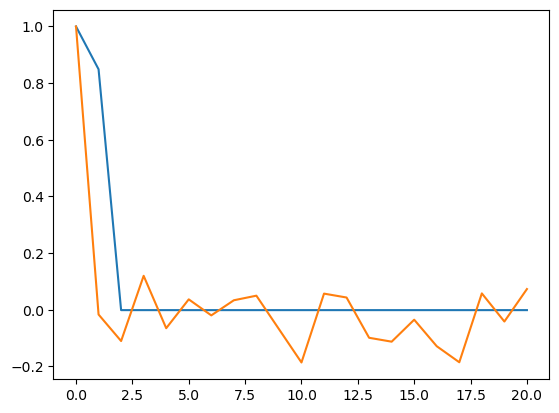

In [20]:
plt.plot(sttc_df.iloc[0]['acf'])
plt.plot(pearson_df.iloc[0]['acf'])

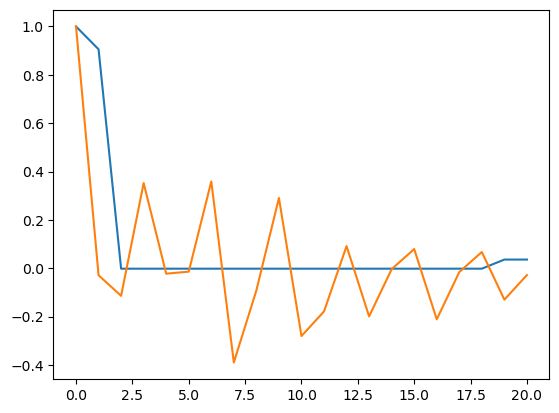

In [22]:
plt.plot(sttc_df.iloc[2390]['acf'])
plt.plot(pearson_df.iloc[2390]['acf'])

In [ ]:
pearson_acf_df_0_1000 = pearson_df.query('tau_ms > 0 and tau_ms <= 1000 and r_squared >= 0.5').copy()
pearson_acf_df_0_1000.head(3)

In [ ]:
acf_columns_labels = ['acf_' + str(i) for i in range(21)]
print(acf_columns_labels)

acf_pearson_df = pearson_df[['unit_id', 'trial_id', 'tau_ms', 'acf_decay_1_4', 'r_squared'] + acf_columns_labels].copy()
acf_pearson_df_0_1000 = acf_pearson_df.query('tau_ms > 0 and tau_ms <= 1000 and r_squared >= 0.8').copy()
print(len(acf_pearson_df_0_1000))

acf_pearson_df_mean = acf_pearson_df.groupby(by='unit_id', as_index=False)[acf_columns_labels].mean()
acf_pearson_df_mean

acf_pearson_mean = acf_pearson_df_mean[acf_columns_labels].values
acf_pearson_mean.shape

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(5,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

t_axis = np.linspace(0, 20, acf_pearson.shape[1])

avg_acf_pearson = np.mean(acf_pearson_mean, axis=0)
#avg_acf_isttc = np.mean(acf_isttc, axis=0)

for ii in range(acf_pearson_mean.shape[0]):
    axes[0].plot(t_axis[1:], acf_pearson_mean[ii][1:], c='k', lw=0.3, alpha=0.1)
axes[0].plot(t_axis[1:], avg_acf_pearson[1:], c='dodgerblue', lw=2, alpha=1)


# for ii in range(acf_isttc.shape[0]):
#     axes[1].plot(t_axis, acf_isttc[ii], c='k', lw=0.3, alpha=0.1)
# axes[1].plot(t_axis, avg_acf_isttc, c='dodgerblue', lw=2, alpha=1)


for ax in axes.flat:
    ax.axhline(y=0, lw=0.5, c='k')
    ax.set_xlabel('Time lag')
    ax.set_ylabel('ACF')
    ax.set_xticks(t_axis)
    ax.set_ylim([-0.1, 0.25])

sns.despine()

#### Taus

In [ ]:
pearson_df_0_1000 = pearson_df_subset.query('tau_ms > 0 and tau_ms <= 1000 and acf_decay_1_4 == True').copy()
print(len(pearson_df_0_1000))

pearson_df_0_1000['tau_ms_log10'] = np.log10(pearson_df_0_1000['tau_ms'])

In [ ]:
count_df = pearson_df_0_1000.groupby(by='unit_id', as_index=False)['trial_id'].count().sort_values(by='trial_id')
count_df.rename(columns={'trial_id':'n_trials'}, inplace=True)
count_df

In [ ]:
# by unit (average over trial)
pearson_df_0_1000_median = pearson_df_0_1000.groupby(by='unit_id', as_index=False)['tau_ms'].median().sort_values(by='tau_ms')
pearson_df_0_1000_median = pearson_df_0_1000_median.merge(count_df, on='unit_id', how='left')
pearson_df_0_1000_median.query('n_trials >= 20')

In [ ]:
# by unit (average over trial)
pearson_df_0_1000_mean = pearson_df_0_1000.groupby(by='unit_id', as_index=False)['tau_ms'].mean().sort_values(by='tau_ms')
pearson_df_0_1000_mean = pearson_df_0_1000_mean.merge(count_df, on='unit_id', how='left')
pearson_df_0_1000_mean.query('n_trials >= 20')

In [ ]:
# plot without grouping 

fig, axes = plt.subplots(1, 2, figsize=(8,3))

sns.violinplot(ax=axes[0], y='tau_ms', data=pearson_df_0_1000, cut=0, density_norm='width')
sns.violinplot(ax=axes[1], y='tau_ms_log10', data=pearson_df_0_1000, cut=0, density_norm='width')

# axes[0].set_title('% trials with fr >= 1hz: {}'.format(perc_trials_above1hz))
# axes[1].set_title('Mean fr {}, mead fr {}'.format(mean_fr, med_fr))

# axes[0].axhline(y=1, lw=1, color='red')
# axes[1].axhline(y=1, lw=1, color='red')

sns.despine()

In [ ]:
# plot with grouping by unit, meadian and mean

fig, axes = plt.subplots(1, 2, figsize=(8,3))

sns.violinplot(ax=axes[0], y='tau_ms', data=pearson_df_0_1000_mean.query('n_trials >= 20'), cut=0, density_norm='width')
sns.violinplot(ax=axes[1], y='tau_ms', data=pearson_df_0_1000_median.query('n_trials >= 20'), cut=0, density_norm='width')

# axes[0].set_title('% trials with fr >= 1hz: {}'.format(perc_trials_above1hz))
# axes[1].set_title('Mean fr {}, mead fr {}'.format(mean_fr, med_fr))

# axes[0].axhline(y=1, lw=1, color='red')
# axes[1].axhline(y=1, lw=1, color='red')

sns.despine()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# sns.stripplot(ax=axes[0], x = 'area_id', y='tau_ms', 
#                order=sttc_df_hp_0_1000_median['area_id'].values,
#                data=sttc_df_hp_0_1000_animal_med, color='white', s=3)
sns.violinplot(ax=axes[0], x = 'area_id', y='tau_ms', 
               order=sttc_df_hp_0_1000_median['area_id'].values,
               data=sttc_df_hp_0_1000_animal_med, cut=0,  scale='width')
axes[0].set_title('med animal sttc in HP, 50ms, 20lags, \n allen, n_animals = ' + str(n_animals))

sns.violinplot(ax=axes[1], x = 'area_id', y='tau_ms', 
               order=sttc_df_hp_0_1000_mean['area_id'].values,
               data=sttc_df_hp_0_1000_animal_mean, cut=0,  scale='width')
# sns.stripplot(ax=axes[1], x = 'area_id', y='tau_ms', 
#                order=sttc_df_hp_0_1000_mean['area_id'].values,
#                data=sttc_df_hp_0_1000_animal_mean, color='white', s=3)
axes[1].set_title('mean animal sttc in HP, 50ms, 20lags, \n allen, n_animals = ' + str(n_animals))

sns.despine()

fig.savefig(isttc_results_folder_path + 'taus_in_hp_mouse_level.png' , bbox_inches='tight')

In [ ]:
# fig, axes = plt.subplots(1,1, figsize=(5,3))

# sns.stripplot(ax=axes, x='area_id', y='tau_ms', order=sttc_df_hp_0_1000_median['area_id'].values, 
#               data=sttc_df_hp_0_1000_median,
#               color='black', label='median', legend=False)
# sns.stripplot(ax=axes, x='area_id', y='tau_ms', order=sttc_df_hp_0_1000_median['area_id'].values,
#               data=sttc_df_hp_0_1000_mean,
#               color='steelblue', label='mean', legend=False)
# axes.axhline(y=100, lw=0.5, c='k')
# axes.axhline(y=50, lw=0.5, c='k')
# # axes[0,0].axhline(y=200, lw=0.5, c='k')
# # axes[0,0].axhline(y=250, lw=0.5, c='k')
# axes.set_title('sttc in HP, 50ms, 10lags, allen')
# axes.set_ylim([0,200])

# sns.despine()

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.violinplot(ax=axes[0], x = 'area_id', y='tau_ms_log10', order=sttc_df_hp_0_1000_median['area_id'].values,
               data=sttc_df_hp_0_1000, cut=0,  scale='width')
axes[0].set_title('units sttc in HP, 50ms, 20lags, \n allen, ' + str(len(sttc_df_hp_0_1000)))

sns.stripplot(ax=axes[1], x='area_id', y='tau_ms', order=sttc_df_hp_0_1000_median['area_id'].values, 
              data=sttc_df_hp_0_1000_median,
              color='black', label='median', legend=False)

sns.stripplot(ax=axes[2], x='area_id', y='tau_ms', order=sttc_df_hp_0_1000_median['area_id'].values,
              data=sttc_df_hp_0_1000_mean,
              color='steelblue', label='mean', legend=False)
axes[2].axhline(y=100, lw=0.5, c='k')
axes[2].axhline(y=150, lw=0.5, c='k')
axes[2].set_title('mean sttc in HP, 50ms, 20lags, \n allen, ' + str(len(sttc_df_hp_0_1000)))
axes[2].set_ylim([50,200])

#axes[0].axhline(y=68, lw=0.5, c='k')
axes[1].axhline(y=100, lw=0.5, c='k')
axes[1].axhline(y=50, lw=0.5, c='k')
axes[1].set_title('med sttc in HP, 50ms, 20lags, \n allen, ' + str(len(sttc_df_hp_0_1000)))
axes[1].set_ylim([30,150])

sns.despine()

fig.savefig(isttc_results_folder_path + 'taus_in_hp_unit_and_area.png' , bbox_inches='tight')

#### Areas from Rudelt et al (6 visual and 2 thalamic)

In [ ]:
sttc_df_subset['area_id'].unique()

In [ ]:
sttc_df_rudelt = sttc_df_subset.query('area_id == "VISp" or area_id == "VISl" or area_id == "VISal" or area_id == "VISrl" or area_id == "VISam" or area_id == "VISpm"').copy()
print(len(sttc_df_rudelt))

sttc_df_rudelt_0_1000 = sttc_df_rudelt.query('tau_ms > 10 and tau_ms <= 1000 and r_squared >= 0.5').copy()
print(len(sttc_df_rudelt_0_1000))

In [ ]:
# by area
sttc_df_rudelt_median = sttc_df_rudelt_0_1000.groupby(by='area_id', as_index=False)['tau_ms'].median().sort_values(by='tau_ms')
sttc_df_rudelt_median

#### Quality

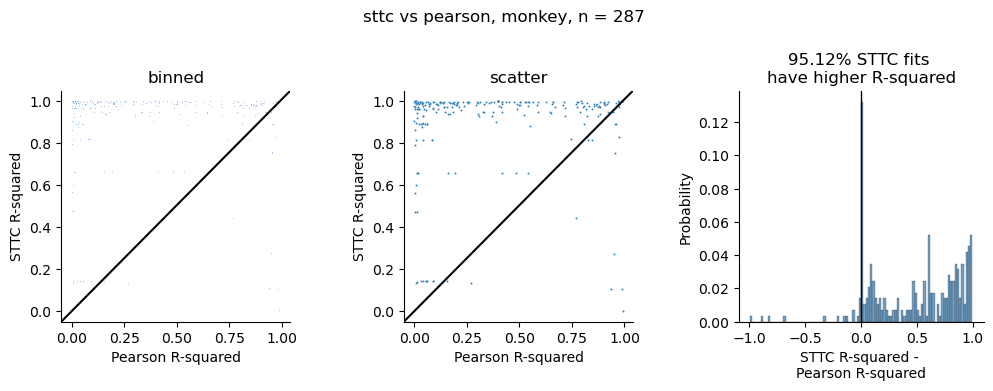

In [14]:
n_sttc_better = len(df_merged.query('diff > 0'))
n_sttc_better_perc = n_sttc_better / len(df_merged) * 100

fig, axes = plt.subplots(1,3, figsize=(12,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.histplot(ax=axes[0], x=df_merged['r_squared_pear'].values, y=df_merged['r_squared_sttc'].values, bins=200)
axes[0].plot([0, 1], [0, 1], c='k', transform=axes[0].transAxes)
axes[0].set_aspect('equal', adjustable='box')
axes[0].set_xlabel('Pearson R-squared')
axes[0].set_ylabel('STTC R-squared')
axes[0].set_title('binned')

sns.scatterplot(ax=axes[1], x=df_merged['r_squared_pear'].values, y=df_merged['r_squared_sttc'].values, s=2)
axes[1].plot([0, 1], [0, 1], c='k', transform=axes[1].transAxes)
axes[1].set_aspect('equal', adjustable='box')
axes[1].set_xlabel('Pearson R-squared')
axes[1].set_ylabel('STTC R-squared')
axes[1].set_title('scatter')

sns.histplot(ax=axes[2], x=df_merged['diff'].values, stat='probability', bins=100, kde=False, color='steelblue')
axes[2].axvline(x=0, lw=1, c='k')
axes[2].set_xlabel('STTC R-squared - \nPearson R-squared')
axes[2].set_title('{}% STTC fits \nhave higher R-squared'.format(np.round(n_sttc_better_perc,2)))

fig.suptitle('sttc vs pearson, monkey, n = ' + str(len(df_merged)), y=1.15)

sns.despine()

fig.savefig(results_folder + 'pfdl_sttc_vs_pearson_50ms_20lags.png' , bbox_inches='tight')

In [ ]:
n_95_fits_sttc = len(df_merged.query('r_squared_sttc >= 0.8'))
n_95_fits_pearson = len(df_merged.query('r_squared_pear >= 0.8'))

print('n_95_fits_sttc {}, n_95_fits_pearson {}'.format(n_95_fits_sttc, n_95_fits_pearson))

diff_0_8 = (n_95_fits_sttc - n_95_fits_pearson) / len(df_merged) * 100
print(diff_0_8)